<center>Myranda Swartzwelter


In [98]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, gc, warnings, random, math

from pandas.plotting import autocorrelation_plot
from sklearn import feature_extraction, linear_model, model_selection, preprocessing, metrics
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from nltk import word_tokenize
from collections import defaultdict


from wordcloud import WordCloud, STOPWORDS

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import Embedding
from keras_preprocessing import sequence
from sklearn.model_selection import train_test_split


In [156]:
#import data
df = pd.read_csv('Project_data/project_2/nlp-getting-started/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [157]:
#split train / test data
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5100, 4) (2513, 4) (5100,) (2513,)


In [101]:
#look at location nans and keyword nans
location_no_nan = df['location'].dropna()
len(location_no_nan)
location_no_nan = location_no_nan.to_frame()

keyword_no_nan = df['keyword'].dropna()
len(keyword_no_nan)
keyword_no_nan = keyword_no_nan.to_frame()
print(len(location_no_nan), len(keyword_no_nan), len(df))

5080 7552 7613


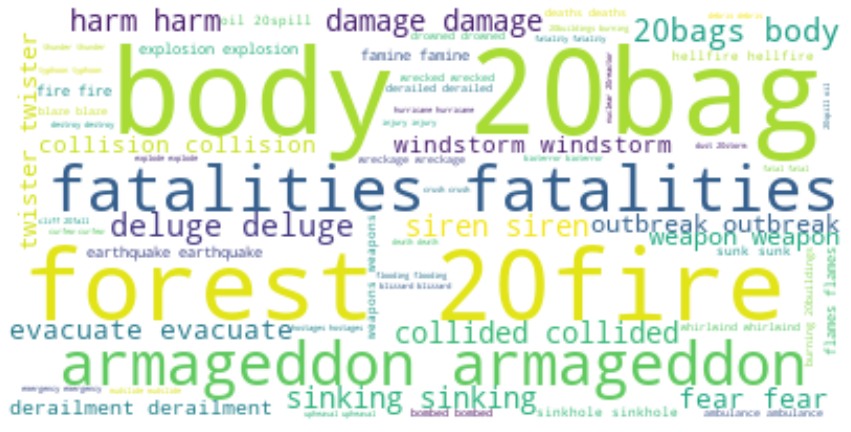

In [102]:
#Keyword 
text = " ".join(i for i in keyword_no_nan.keyword)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

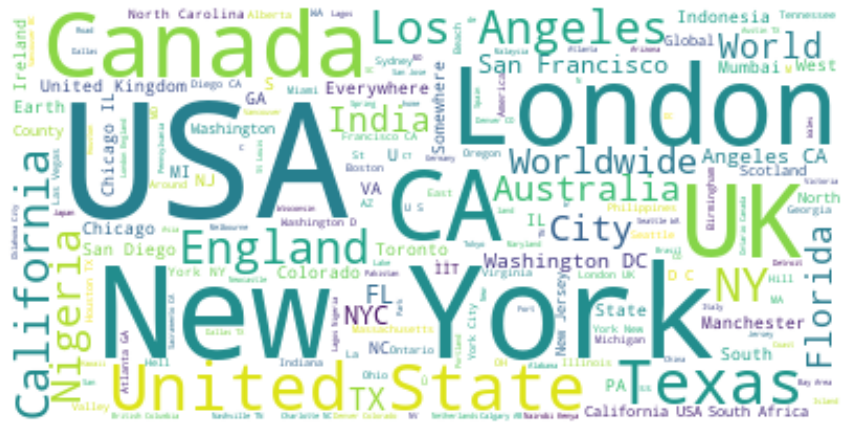

In [103]:
#location word cloud
text = " ".join(i for i in location_no_nan.location)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

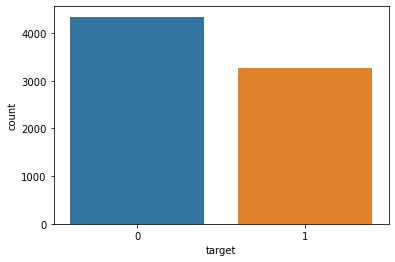

In [104]:
#Plot the data frequency of a disaster texts
ax = sns.countplot(x='target',  data=df)
plt.show()

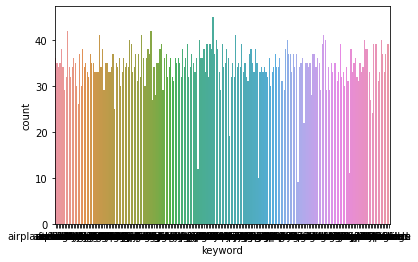

In [105]:
#Plot the data frequency of a disaster texts
ax = sns.countplot(x='keyword',  data=df)
plt.show()

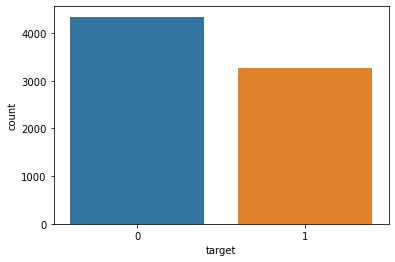

In [106]:
#Plot the data with proper labeling
ax = sns.countplot(x='target',  data=df)
plt.show()

In [186]:
#Base model: linear model with count vectorizer

count_vectorizer = CountVectorizer()

train_vectors = count_vectorizer.fit_transform(X_train["text"])

test_vectors = count_vectorizer.transform(X_test["text"])

clf = linear_model.RidgeClassifier()

scores = model_selection.cross_val_score(clf, train_vectors, y_train, cv=3, scoring="f1")
print("F1: ",  scores)

scores = model_selection.cross_val_score(clf, train_vectors, y_train, cv=3, scoring="accuracy")
scores

clf.fit(train_vectors, y_train)

y_pred = clf.predict(test_vectors)

F1:  [0.72586328 0.73323823 0.71575847]


In [124]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [159]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(RMSE, r2)

0.46654916755484643 0.11180184022123996


In [164]:
y_test_list = y_test.values.tolist()

n_right = 0

#print(y_test)
for i in range(len(y_pred)):
    if y_pred[i] == y_test_list[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test_list)) * 100)))

Accuracy: 78.23%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


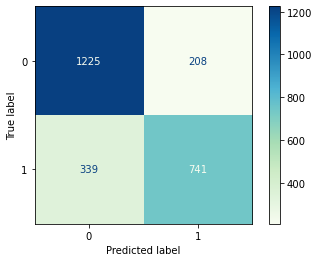

In [162]:
confusion_matrix = metrics.plot_confusion_matrix(clf, test_vectors, y_test, cmap='GnBu')
print(confusion_matrix) 

In [154]:
df = pd.read_csv('Project_data/project_2/nlp-getting-started/train.csv')
df.head()

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)


count_vect = CountVectorizer()


x_train_counts = count_vectorizer.fit_transform(X_train["text"])

x_test_counts = count_vectorizer.transform(X_test["text"])


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_test_tfidf = tfidf_transformer.transform(x_test_counts)


clf = clf = linear_model.RidgeClassifier().fit(x_train_tfidf, y_train)
y_score = clf.predict(x_test_tfidf)

y_test_list = y_test.values.tolist()

n_right = 0

#print(y_test)
for i in range(len(y_score)):
    if y_score[i] == y_test_list[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test_list)) * 100)))

Accuracy: 78.67%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


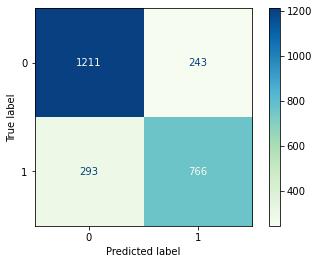

In [155]:
confusion_matrix = metrics.plot_confusion_matrix(clf, x_test_tfidf, y_test, cmap='GnBu')
print(confusion_matrix)

In [129]:
#MultinomialNB

df = pd.read_csv('Project_data/project_2/nlp-getting-started/train.csv')
df.head()

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)


count_vect = CountVectorizer()


x_train_counts = count_vectorizer.fit_transform(X_train["text"])

x_test_counts = count_vectorizer.transform(X_test["text"])


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_test_tfidf = tfidf_transformer.transform(x_test_counts)


clf = MultinomialNB().fit(x_train_tfidf, y_train)
y_score = clf.predict(x_test_tfidf)

y_test_list = y_test.values.tolist()

n_right = 0

#print(y_test)
for i in range(len(y_score)):
    if y_score[i] == y_test_list[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test_list)) * 100)))

Accuracy: 79.39%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


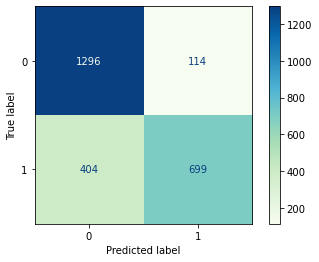

In [130]:
confusion_matrix = metrics.plot_confusion_matrix(clf, x_test_tfidf, y_test, cmap='GnBu')
print(confusion_matrix)

In [131]:
#SVC

from sklearn.svm import SVC

clf = SVC(kernel='linear').fit(x_train_tfidf, y_train)
y_score = clf.predict(x_test_tfidf)

y_test_list = y_test.values.tolist()

n_right = 0

#print(y_test)
for i in range(len(y_score)):
    if y_score[i] == y_test_list[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test_list)) * 100)))

Accuracy: 80.14%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


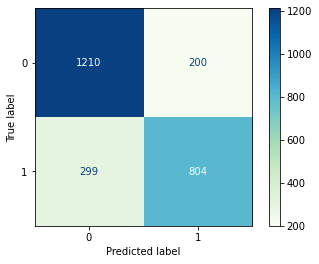

In [132]:
confusion_matrix = metrics.plot_confusion_matrix(clf, x_test_tfidf, y_test, cmap='GnBu')
print(confusion_matrix)

In [152]:
#Random Forest

clf = RandomForestClassifier(n_estimators = 100).fit(x_train_tfidf, y_train)
y_score = clf.predict(x_test_tfidf)

y_test_list = y_test.values.tolist()

n_right = 0

#print(y_test)
for i in range(len(y_score)):
    if y_score[i] == y_test_list[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test_list)) * 100)))

Accuracy: 78.43%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


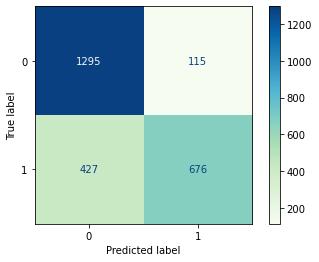

In [153]:
confusion_matrix = metrics.plot_confusion_matrix(clf, x_test_tfidf, y_test, cmap='GnBu')
print(confusion_matrix)

In [138]:
#Neural Network

def count_top_x_words(corpus, top_x, skip_top_n):
    count = defaultdict(lambda: 0)
    for c in corpus:
        for w in word_tokenize(c):
            count[w] += 1
    count_tuples = sorted([(w, c) for w, c in count.items()], key=lambda x: x[1], reverse=True)
    return [i[0] for i in count_tuples[skip_top_n: skip_top_n + top_x]]


def replace_top_x_words_with_vectors(corpus, top_x):
    topx_dict = {top_x[i]: i for i in range(len(top_x))}

    return [
        [topx_dict[w] for w in word_tokenize(s) if w in topx_dict]
        for s in corpus
    ], topx_dict


def filter_to_top_x(corpus, n_top, skip_n_top=0):
    top_x = count_top_x_words(corpus, n_top, skip_n_top)
    return replace_top_x_words_with_vectors(corpus, top_x)

In [139]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import Embedding
from keras_preprocessing import sequence
#from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split


In [175]:
text_list = df['text'].tolist()
mapped_list, word_list = filter_to_top_x(text_list, 2500, 10)

max_review_length = 400

mapped_list = sequence.pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, df['target'], test_size=0.3)

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(150, 5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=3, batch_size=64)

y_score = model.predict(test_x)

Epoch 1/3
84/84 [==============================] - 7s 80ms/step - loss: 0.6643 - accuracy: 0.6012
Epoch 2/3
84/84 [==============================] - 7s 82ms/step - loss: 0.4299 - accuracy: 0.8112
Epoch 3/3
72/72 [==============================] - 1s 9ms/step


In [182]:
y_score 
y_pred = (y_score > 0.5) * 1

In [180]:
y_test_list = test_y.values.tolist()

n_right = 0

#print(y_test)
for i in range(len(y_score)):
    if y_pred[i] == y_test_list[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test_list)) * 100)))

Accuracy: 78.11%


In [181]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_list, y_pred)

array([[1164,  145],
       [ 355,  620]])